### 1. K-Means

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets    # use a built-in dataset in sklearn

In [4]:
%matplotlib inline
plt.figure(figsize=(7,4))    # setting plotting layout

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [6]:
iris = datasets.load_iris()

X = scale(iris.data)    # clustering needs scaled data
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [7]:
y[0:5]

,0
0,0
1,0
2,0
3,0
4,0


In [8]:
clustering = KMeans(n_clusters=3, random_state=5)    # K=3

clustering.fit(X)    # fitting the data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

#### Plotting outputs

In [9]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']

Text(0.5, 1.0, 'K-Means Classification')

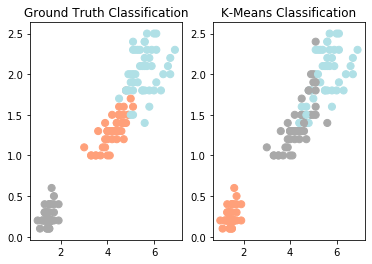

In [10]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50) # size = 50
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

# Labels are wrong

Text(0.5, 1.0, 'K-Means Classification')

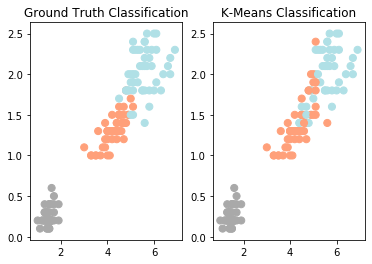

In [13]:
relabel = np.choose(clustering.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')

#### Evaluate

In [14]:
# Classification report -> compare predicted y with actual y

print(classification_report(y, relabel))

# should have high precision + high recall = high accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



------------

### 2. Hierachical Clustering

#### Unsupervised - based on the distance between each data point and its nearest neighbour
#### Distance Metrics: Euclidean, Manhattan, Cosine
#### Linkage Parameters: Ward, Complete, Avrage

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
import sklearn.metrics as sm

In [16]:
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [17]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [18]:
# import dataset

cars = pd.read_csv('C:/Users/brant/Google Drive/extra study/Machine Learning/Python for Data Science - Machine Learning/Exercise Files/Data/mtcars.csv')
# rename columns
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

X = cars[['mpg', 'disp', 'hp', 'wt']].values    # data

y = cars.iloc[:,9].values    # target

#### Generate a Dendrogram

In [21]:
Z = linkage(X, 'ward')

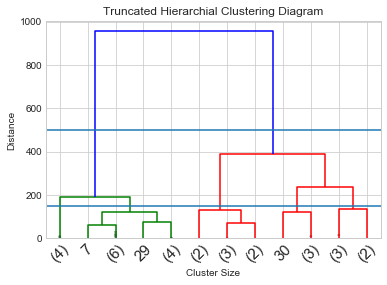

In [22]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15, show_contracted=True)

plt.title('Truncated Hierarchial Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

# there are two clusters among cars: automatic and transmission, K=2
# set maximum distance at 500 -> to have K=2

#### Genearte and run the model

In [23]:
Hclustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

----------------

### 3. DBSCAN

#### Unsupervised - cluster samples in dense area and denote (show) samples in sparse area
#### Parameters: eps - max distance = 0.1, min_samples =  how many samples are dense areas?

In [30]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [31]:
df = pd.read_csv('C:/Users/brant/Google Drive/extra study/Machine Learning/Python for Data Science - Machine Learning/Exercise Files/Data/iris.data.csv', header=None, sep=',')

df.columns=['Sepal Length','Sepal Width','Petal Length','Petal Width', 'Species']

data = df.iloc[:,0:4].values
target = df.iloc[:,4].values

df[0:5]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Generate and run the model

In [32]:
model = DBSCAN(eps=0.8,  min_samples=19).fit(data)
# when distance < 0.8, it's within the same cluster
# when # of samples > 19, it's core
print(model)     

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=19, n_jobs=None, p=None)


#### Use DBSCAN to remove outliers

In [33]:
outliers_df = pd.DataFrame(data)

print(Counter(model.labels_))

print(outliers_df[model.labels_ ==-1])    # -1 -> non-core data, outliers 
# -> 6个 -> 4% is good, should be <5%

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

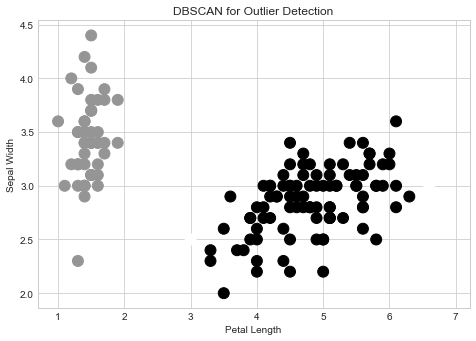

In [34]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

colors = model.labels_

ax.scatter(data[:,2], data[:,1], c=colors, s=120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for Outlier Detection')